## Testando os Dados da EQUINOR

In [94]:
import pandas as pd

### Carregando dados dos poços:

Foi criado um dicionario em que casa Key é um poço (no formato Pandas).

In [95]:
dict= {}
vect = [1,4,5,10,11,12,14,15]

for i in vect:
    mud_i = pd.read_csv(f'./Base/MUD_LOG_{str(i)}.csv')
    mud_i = mud_i.assign(mud=i)
    dict[f"mud_{i}"] = mud_i


dict['mud_10'].head()

,DEPT,DVER,BDIA,ROPA,HKLA,HKLX,WOBA,TQA,TQX,RPMA,...,IBTA,NBTA,IPNA,NPNA,C1C2,C1C3,C1C4,C1C5,LITH,mud
0,147,147.0,8.5,1.43,84.67,87.92,1.00,1.15,17.18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
1,148,148.0,8.5,1.26,84.67,87.92,0.21,1.25,17.18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
2,149,149.0,8.5,1.65,84.67,87.92,1.00,1.35,17.18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
3,150,150.0,8.5,1.42,84.67,87.92,1.32,1.34,17.18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
4,151,151.0,8.5,1.58,84.67,87.92,2.76,1.25,17.18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [96]:
dict['mud_1'].head()

,DEPT,DVER,BDIA,ROPA,HKLA,HKLX,WOBA,TQA,TQX,RPMA,...,IBTA,NBTA,IPNA,NPNA,C1C2,C1C3,C1C4,C1C5,LITH,mud
0,145,145.0,36.0,21.83,36.04,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,146,146.0,36.0,29.00,35.28,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,147,147.0,36.0,41.00,35.29,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,148,148.0,36.0,20.00,35.32,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,149,149.0,36.0,15.00,35.29,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


### Features



Reduzir as colunas para apenas as listadas abaixo:

DEPT	M	Depth</br>
BDIA 	INCH	Bit Diameter</br>
ROPA 	M/HR	Rate of Penetration, Average</br>
HKLA	TON	Average Hookload </br>
WOBA	TON	Weight on Bit - average</br>
TQA	KNM	Torque A, average</br>
RPMB	RPM	Average Bit RPM</br>
SPPA	BAR	Average Pump Pressure - Stand Pipe</br>
MFIA	L/MN	Mud Flow In - Average</br>
MDIA	G/CC	Mud Density In - Average</br>
MTIA	DEGC	Mud Temperature In - Average (Graus Celsius)</br>
LITH	....	Lithology</br>

In [97]:
dict['mud_11'].rename(columns={'TDEP': 'DEPT'}, inplace=True)

In [98]:
selected_features = ['DEPT', 'BDIA', 'ROPA', 'HKLA', 'WOBA', 'TQA','RPMB','SPPA','MFIA', 'MDIA','MTIA','LITH','mud']
for i in vect:
    dict[f'mud_{i}'] = dict[f'mud_{i}'][selected_features]

In [99]:
dict['mud_4'].head()

,DEPT,BDIA,ROPA,HKLA,WOBA,TQA,RPMB,SPPA,MFIA,MDIA,MTIA,LITH,mud
0,145,36.0,21.83,36.04,0.0,0.0,0.0,5.6,604.00,NaN,0.0,NaN,4
1,146,36.0,29.00,35.28,0.0,0.0,0.0,6.0,604.15,NaN,0.0,NaN,4
2,147,36.0,41.00,35.29,0.0,0.0,0.0,7.0,604.15,NaN,0.0,NaN,4
3,148,36.0,20.00,35.32,0.0,0.0,0.0,7.0,604.15,NaN,0.0,NaN,4
4,149,36.0,15.00,35.29,0.0,0.0,0.0,8.0,604.15,NaN,0.0,NaN,4


In [100]:
print(len(dict))

8


### Estabelecendo condições simulando o Pré-Sal


Apenas limestone (700) e diâmetros de broca 12.25 e 8.5.

In [101]:
dict['mud_4'].head()

,DEPT,BDIA,ROPA,HKLA,WOBA,TQA,RPMB,SPPA,MFIA,MDIA,MTIA,LITH,mud
0,145,36.0,21.83,36.04,0.0,0.0,0.0,5.6,604.00,NaN,0.0,NaN,4
1,146,36.0,29.00,35.28,0.0,0.0,0.0,6.0,604.15,NaN,0.0,NaN,4
2,147,36.0,41.00,35.29,0.0,0.0,0.0,7.0,604.15,NaN,0.0,NaN,4
3,148,36.0,20.00,35.32,0.0,0.0,0.0,7.0,604.15,NaN,0.0,NaN,4
4,149,36.0,15.00,35.29,0.0,0.0,0.0,8.0,604.15,NaN,0.0,NaN,4


In [102]:
diameters = dict['mud_4']['BDIA'].unique()
diameters

array([36.  , 17.5 , 12.25,  8.5 ])

In [103]:
liths = dict['mud_4']['LITH'].unique()
liths

array([   nan, 600.  , 600.39, 600.17, 600.32, 300.  , 700.  , 800.  ,
       700.17, 600.38, 400.17, 300.23, 400.  ])

Deixando apenas limestone

In [104]:
dict_lime = {}
for i in vect:
    dict[f'mud_{i}'] = dict[f'mud_{i}'].dropna(subset=['LITH'])
    dict_lime[f'mud_{i}']  = dict[f'mud_{i}'][ dict[f'mud_{i}']['LITH'].astype(int) == 700]

dict_lime['mud_4'].head()

,DEPT,BDIA,ROPA,HKLA,WOBA,TQA,RPMB,SPPA,MFIA,MDIA,MTIA,LITH,mud
2596,2741,12.25,19.86,158.58,8.00,23.79,169.0,213.1,3517.33,1.41,16.49,700.0,4
2597,2742,12.25,10.46,158.63,7.96,22.66,167.0,212.5,3517.75,1.41,16.49,700.0,4
2598,2743,12.25,10.37,158.35,8.24,23.19,167.0,212.1,3517.46,1.41,16.49,700.0,4
2599,2744,12.25,3.92,161.31,5.28,18.37,178.0,211.6,3517.35,1.41,16.47,700.0,4
2600,2745,12.25,4.11,160.36,6.23,18.34,179.0,211.0,3517.36,1.41,16.44,700.0,4


In [105]:
dict_lime_1225 = {}
dict_lime_85 = {}

for i in vect:
    dict_lime_1225[f'mud_{i}'] = dict_lime[f'mud_{i}'][dict_lime[f'mud_{i}']['BDIA'] == 12.25]
    dict_lime_85[f'mud_{i}'] = dict_lime[f'mud_{i}'][dict_lime[f'mud_{i}']['BDIA'] == 8.5]

#Para o mud_1
print("(BDIA) Quantidade de linhas caiu de ", dict_lime['mud_1'].shape[0], "para")
print(dict_lime_1225['mud_1'].shape[0], "(12.25 inches) e", dict_lime_85['mud_1'].shape[0], "(8.5 inches)")

(BDIA) Quantidade de linhas caiu de  170 para
30 (12.25 inches) e 140 (8.5 inches)


In [106]:
print(len(dict_lime_85))

8


In [107]:
dict_lime_1225.keys()

dict_keys(['mud_1', 'mud_4', 'mud_5', 'mud_10', 'mud_11', 'mud_12', 'mud_14', 'mud_15'])

In [108]:
# Juntando todos os de 1225 em um unico df:

df_all_1225 = pd.DataFrame()
for i in vect:
    df_all_1225 = pd.concat([df_all_1225, dict_lime_1225[f'mud_{i}']])

print('N de Features: ', df_all_1225.shape[1])
df_all_1225.head()

N de Features:  13


,DEPT,BDIA,ROPA,HKLA,WOBA,TQA,RPMB,SPPA,MFIA,MDIA,MTIA,LITH,mud
2596,2741,12.25,19.86,158.58,8.00,23.79,169.0,213.1,3517.33,1.41,16.49,700.0,1
2597,2742,12.25,10.46,158.63,7.96,22.66,167.0,212.5,3517.75,1.41,16.49,700.0,1
2598,2743,12.25,10.37,158.35,8.24,23.19,167.0,212.1,3517.46,1.41,16.49,700.0,1
2599,2744,12.25,3.92,161.31,5.28,18.37,178.0,211.6,3517.35,1.41,16.47,700.0,1
2600,2745,12.25,4.11,160.36,6.23,18.34,179.0,211.0,3517.36,1.41,16.44,700.0,1


In [109]:
# Juntnado todos os de 85 em um unico df:

df_all_85 = pd.DataFrame()
for i in vect:
    df_all_85 = pd.concat([df_all_85, dict_lime_85[f'mud_{i}']])

print('N de Features: ', df_all_85.shape[1])
df_all_85.head()

N de Features:  13


,DEPT,BDIA,ROPA,HKLA,WOBA,TQA,RPMB,SPPA,MFIA,MDIA,MTIA,LITH,mud
2626,2771,8.5,38.20,145.42,2.50,11.44,29.00,129.9,1493.88,1.43,16.30,700.0,1
2627,2772,8.5,9.32,142.54,5.38,13.08,29.00,140.7,1493.85,1.43,16.51,700.0,1
2628,2773,8.5,4.35,142.14,5.77,13.48,30.00,140.8,1493.99,1.43,16.53,700.0,1
2629,2774,8.5,5.45,142.26,5.66,13.82,30.00,141.9,1493.92,1.43,16.56,700.0,1
2630,2775,8.5,1.23,142.29,2.44,11.79,29.96,205.2,1947.16,1.42,16.67,700.0,1


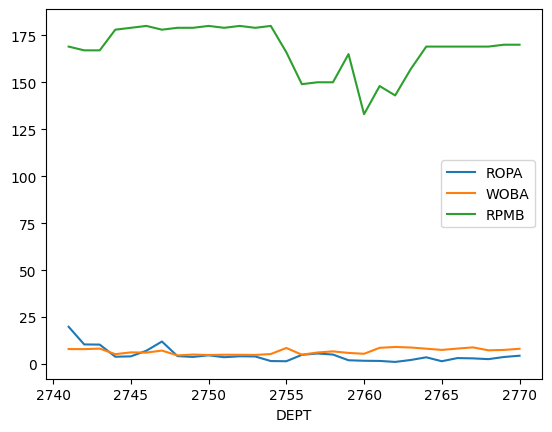

In [110]:
# Plotando  ROP, WOB e RPM do poço 4 com brocas 12,25

df_all_1225[df_all_1225['mud'] == 4].plot(x='DEPT', y = ['ROPA', 'WOBA', 'RPMB']);

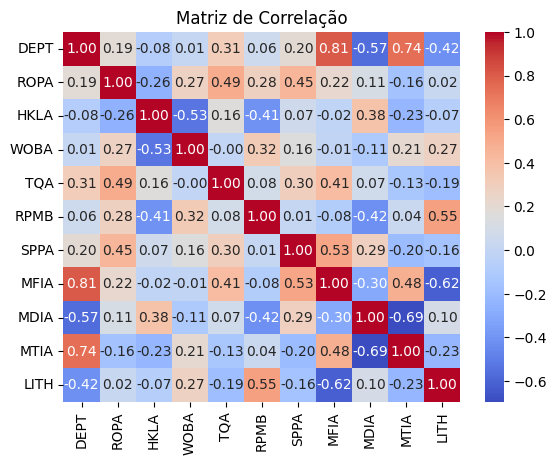

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_all_85.drop(['BDIA','mud'], axis = 1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt = ".2f")
plt.title('Matriz de Correlação')
plt.show()

### Graficos do Teste Pré Operacional

In [112]:
dict_lime_85['mud_1']['RPMB'].unique()

array([ 29.  ,  30.  ,  29.96,  29.76,  30.16,  29.51,  30.11,  29.81,
        30.36,  30.08,  30.14,  30.03,  30.21,  30.47,  30.18,  30.31,
        29.63,  30.06,  30.39,  29.8 ,  29.56,  30.87,  30.64,  29.89,
        29.99,  30.24,  29.7 ,  30.42,  30.57,  29.88,  29.91,  30.51,
        29.68,  30.75,  30.19,  29.71,  29.55,  30.29,  29.38,  30.74,
        31.2 ,  30.41,  30.09,  39.97,  39.85,  39.69,  39.59,  39.56,
        39.89,  40.07,  39.61,  39.44,  40.73,  40.17,  40.  ,  39.99,
        38.98,  39.9 ,  40.25,  39.34,  39.57,  40.45,  39.87,  39.66,
        40.58,  40.2 ,  39.74,  40.28,  40.12,  40.04,  40.27,  39.94,
        39.67,  40.48,  40.32,  40.22,  39.75,  40.5 ,  40.33,  40.18,
        39.79,  40.56,  39.92, 180.26, 180.28, 179.35, 179.4 , 180.34,
       179.96, 180.49, 180.19, 180.87, 179.5 , 180.16, 179.67, 179.15,
       179.47, 180.13, 179.19, 179.32, 178.66])

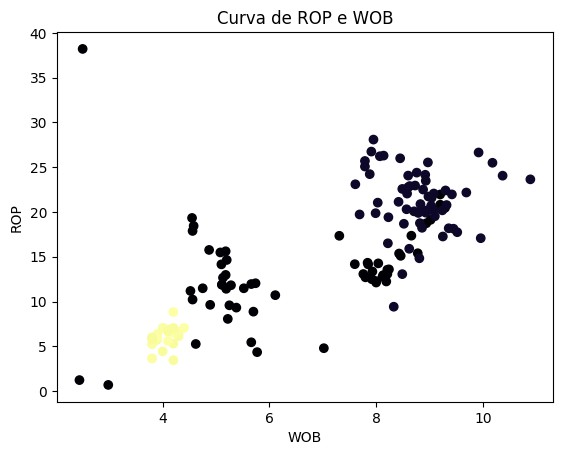

In [113]:
import matplotlib.pyplot as plt


#plt.scatter(df_all_85['WOBA'], df_all_85['ROPA'], c = df_all_85['mud'])
plt.scatter(dict_lime_85['mud_1']['WOBA'], dict_lime_85['mud_1']['ROPA'], c = dict_lime_85['mud_1']['RPMB'], cmap='inferno')

plt.xlabel('WOB')
plt.ylabel('ROP')

plt.title('Curva de ROP e WOB')

plt.show()

### Função de erro

In [114]:
import pandas as pd
import numpy as np

erros = pd.DataFrame(columns=['Model', 'Parameters', 'Mean Absolute Error', 'Mean Absolute Percentage Error', 'R2 Score', 'Mean Squared Error', 'Root Mean Squared Error'])
erros.head()

,Model,Parameters,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score,Mean Squared Error,Root Mean Squared Error


In [115]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error

def error_report(y_test, previsoes, model_name, code, erros):
    mae = mean_absolute_error(y_test, previsoes)
    mape = mean_absolute_percentage_error(y_test, previsoes)
    r2 = r2_score(y_test, previsoes)
    mse = mean_squared_error(y_test, previsoes)
    rmse = np.sqrt(mse)

    erros.loc[len(erros.index)]= [model_name, code, mae, mape,r2, mse, rmse]

    print('Mean Absolute Error:', mae)
    print('Mean Absolute percentage Error', mape)
    print('R2 Score', r2)
    print('Root Mean Squared Error', rmse)

### Support Vector Regression

In [116]:
# dict_lime_1225 = {}
# dict_lime_85 = {}


# for i in vect:
#     dict[f'mud_{i}'] = dict[f'mud_{i}'].dropna(subset=['LITH'])
#     dict_lime_1225[f'mud_{i}'] = dict[f'mud_{i}'][ np.logical_and(dict[f'mud_{i}']['BDIA'] == 12.25 , dict[f'mud_{i}']['LITH'].astype(int) == 700)]
#     dict_lime_85[f'mud_{i}'] = dict[f'mud_{i}'][ np.logical_and(dict[f'mud_{i}']['BDIA'] == 8.5 , dict[f'mud_{i}']['LITH'].astype(int) == 700)]

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

X = df_all_85.drop(['ROPA', 'LITH'], axis=1)
y = df_all_85['ROPA']


In [118]:
df_all_85.head()

,DEPT,BDIA,ROPA,HKLA,WOBA,TQA,RPMB,SPPA,MFIA,MDIA,MTIA,LITH,mud
2626,2771,8.5,38.20,145.42,2.50,11.44,29.00,129.9,1493.88,1.43,16.30,700.0,1
2627,2772,8.5,9.32,142.54,5.38,13.08,29.00,140.7,1493.85,1.43,16.51,700.0,1
2628,2773,8.5,4.35,142.14,5.77,13.48,30.00,140.8,1493.99,1.43,16.53,700.0,1
2629,2774,8.5,5.45,142.26,5.66,13.82,30.00,141.9,1493.92,1.43,16.56,700.0,1
2630,2775,8.5,1.23,142.29,2.44,11.79,29.96,205.2,1947.16,1.42,16.67,700.0,1


In [119]:
X.head()

,DEPT,BDIA,HKLA,WOBA,TQA,RPMB,SPPA,MFIA,MDIA,MTIA,mud
2626,2771,8.5,145.42,2.50,11.44,29.00,129.9,1493.88,1.43,16.30,1
2627,2772,8.5,142.54,5.38,13.08,29.00,140.7,1493.85,1.43,16.51,1
2628,2773,8.5,142.14,5.77,13.48,30.00,140.8,1493.99,1.43,16.53,1
2629,2774,8.5,142.26,5.66,13.82,30.00,141.9,1493.92,1.43,16.56,1
2630,2775,8.5,142.29,2.44,11.79,29.96,205.2,1947.16,1.42,16.67,1


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 9)

In [121]:
svr = SVR(kernel = 'linear', C=1.0, epsilon = 0.1)

In [122]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [123]:
y_pred = svr.predict(X_test)

In [124]:
# kernel = 'linear'
error_report(y_test, y_pred, 'Support Vector Regression ', 'SVR(kernel = \'linear\', C=1.0, epsilon = 0.1)', erros)

Mean Absolute Error: 4.5578354067393345
Mean Absolute percentage Error 0.38267087772716196
R2 Score 0.5583985008283159
Root Mean Squared Error 6.184066540259728


In [125]:
erros.head()

,Model,Parameters,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score,Mean Squared Error,Root Mean Squared Error
0,Support Vector Regression,"SVR(kernel = 'linear', C=1.0, epsilon = 0.1)",4.557835,0.382671,0.558399,38.242679,6.184067


#### Resultados:
<h5>Linear:</h5>
<ul>
    <li>Mean Absolute Error: 4.5578354067393345</li>
    <li>Mean Absolute Percentage Error: 0.38267087772716196</li>
    <li>R2 Score: 0.5583985008283159</li>
    <li>Root Mean Squared Error: 6.184066540259728</li>
</ul>

<h5>Rbf:</h5>
<ul>
    <li>Mean Absolute Error: 6.245945090380941</li>
    <li>Mean Absolute Percentage Error: 0.7252770662935063</li>
    <li>R2 Score: 0.06642632763558298</li>
    <li>Root Mean Squared Error: 8.99152139968017</li>
</ul>

<h5>Poly:</h5>
<ul>
    <li>Mean Absolute Error: 6.259906303262824</li>
    <li>Mean Absolute Percentage Error: 0.723963992045349</li>
    <li>R2 Score: 0.0715407020873734</li>
    <li>Root Mean Squared Error: 8.966858556879611</li>
</ul>

##### Graficamente

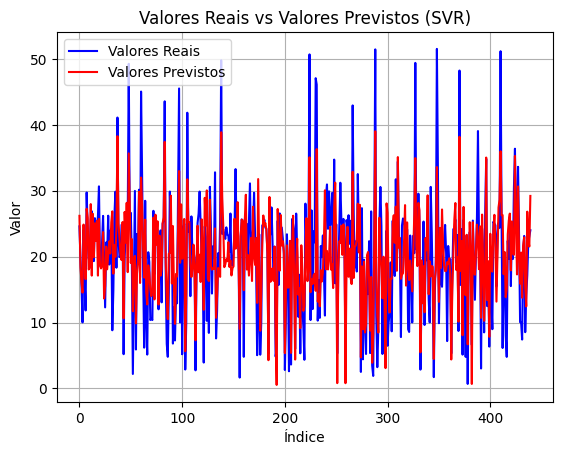

In [126]:
indices = range(len(y_test))
plt.plot(indices,y_test,label='Valores Reais', color='blue')
plt.plot(indices, y_pred, label = 'Valores Previstos', color='red')
plt.title('Valores Reais vs Valores Previstos (SVR)')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

### SHAP: SVR

In [127]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [128]:
import shap

In [129]:
background_data_summary = shap.sample(X_train, 100)

explainer = shap.KernelExplainer(svr.predict, background_data_summary)

In [130]:
shap_values = explainer.shap_values(X_test)

100%|██████████| 440/440 [40:33<00:00,  5.53s/it]


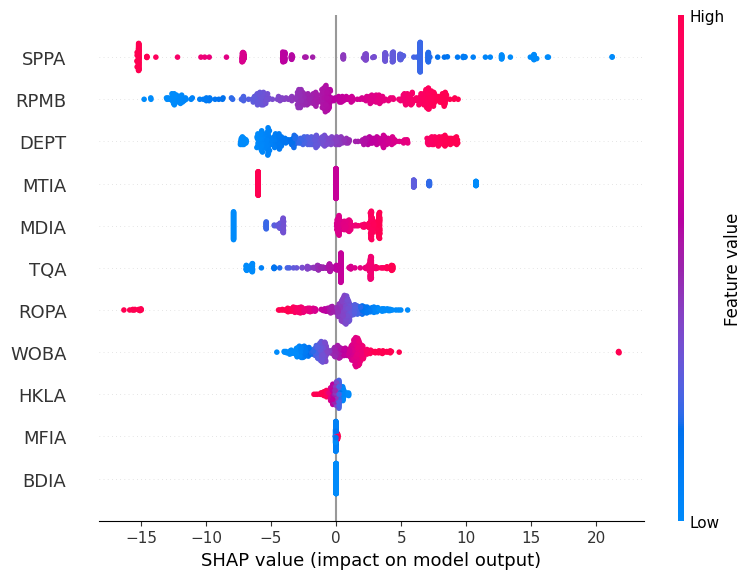

In [133]:
shap.summary_plot(shap_values, X_test, feature_names=selected_features)

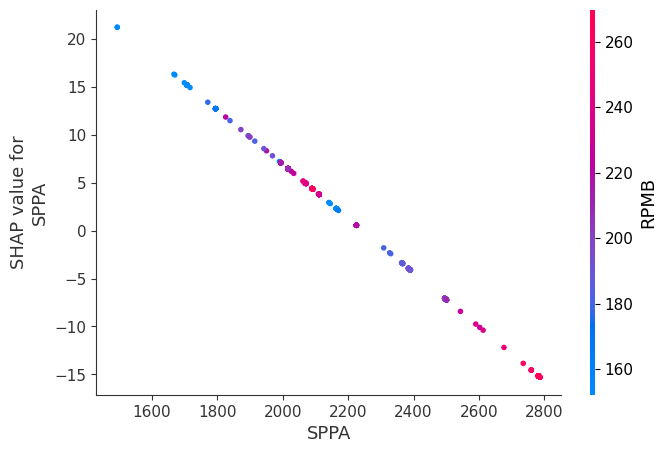

In [134]:
shap.dependence_plot("SPPA", shap_values, X_test, feature_names=selected_features)

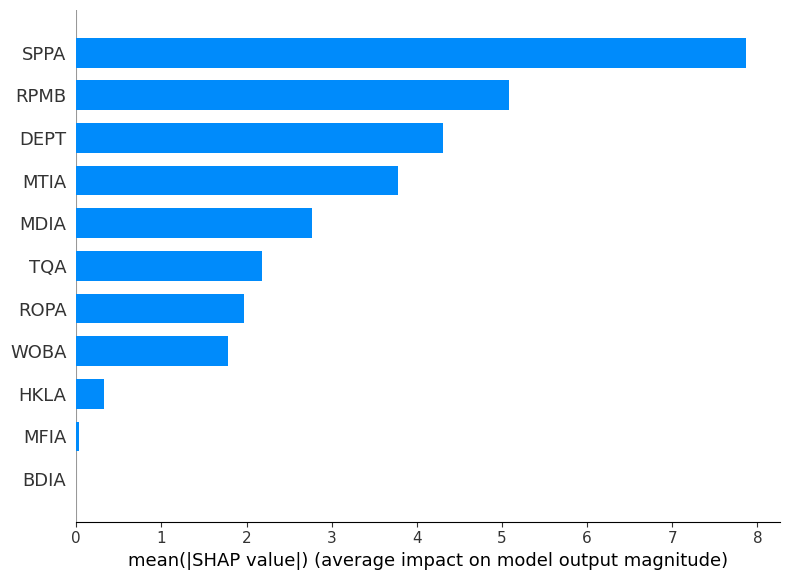

In [135]:
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=selected_features)

### Random Forest 

In [136]:
from sklearn.ensemble import RandomForestRegressor

In [137]:
rf_model = RandomForestRegressor()

In [138]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [139]:
y_pred = rf_model.predict(X_test)

In [140]:
# def error_report(y_test, previsoes, model_name, code, erros)
# error_report(y_test, y_pred, 'Support Vector Regression ', 'SVR(kernel = \'linear\', C=1.0, epsilon = 0.1)', erros)
error_report(y_test, y_pred, 'Random Forest Regressor', 'RandomForestRegressor()', erros)
erros.head()

Mean Absolute Error: 1.3044099999999994
Mean Absolute percentage Error 0.09734928528988877
R2 Score 0.9255199234225233
Root Mean Squared Error 2.539679665036517


,Model,Parameters,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score,Mean Squared Error,Root Mean Squared Error
0,Support Vector Regression,"SVR(kernel = 'linear', C=1.0, epsilon = 0.1)",4.557835,0.382671,0.558399,38.242679,6.184067
1,Random Forest Regressor,RandomForestRegressor(),1.304410,0.097349,0.925520,6.449973,2.539680


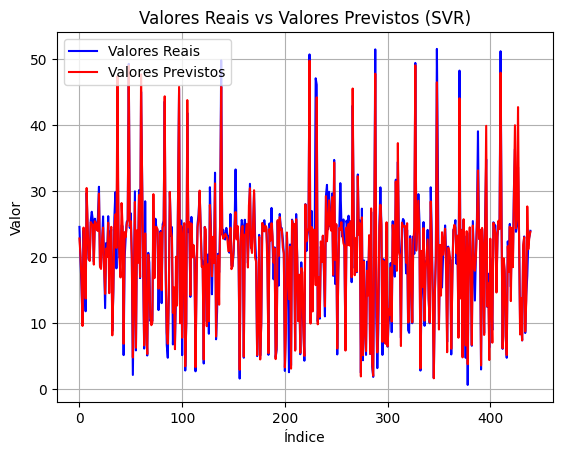

In [ ]:
indices = range(len(y_test))
plt.plot(indices,y_test,label='Valores Reais', color='blue')
plt.plot(indices, y_pred, label = 'Valores Previstos', color='red')
plt.title('Valores Reais vs Valores Previstos (SVR)')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

### SHAP: Random Forest

In [47]:
import shap

In [ ]:
background_data_summary = shap.sample(X_train, 100)

explainer = shap.KernelExplainer(rf_model.predict, background_data_summary)

In [ ]:
shap_values = explainer.shap_values(X_test)

100%|██████████| 440/440 [05:41<00:00,  1.29it/s]


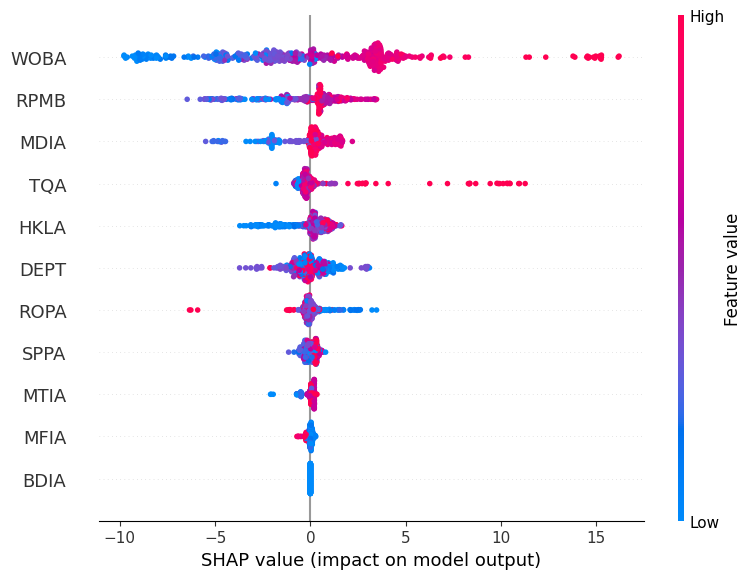

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=selected_features)

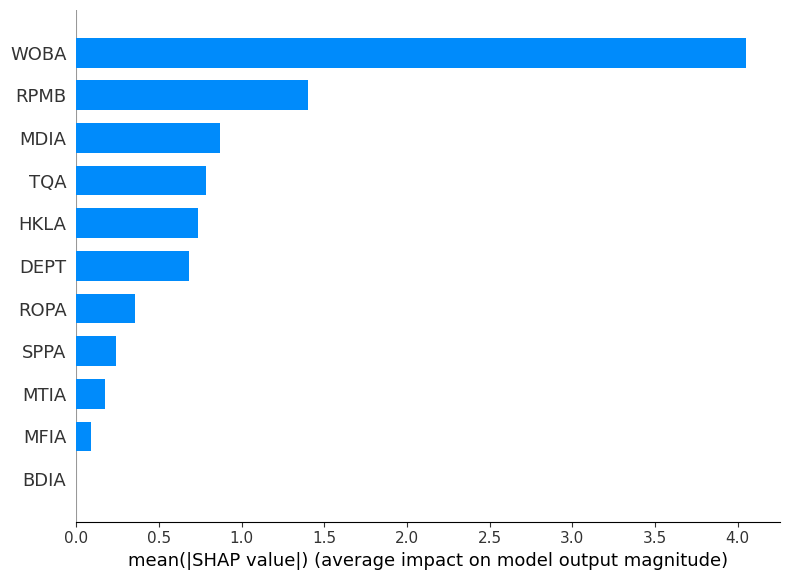

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=selected_features)

### Gradient Boosting

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

In [74]:
gb_model = GradientBoostingRegressor()

In [75]:
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [76]:
y_pred = gb_model.predict(X_test)

In [78]:
# def error_report(y_test, previsoes, model_name, code, erros)
# error_report(y_test, y_pred, 'Support Vector Regression ', 'SVR(kernel = \'linear\', C=1.0, epsilon = 0.1)', erros)
error_report(y_test, y_pred,'Gradient Boosting Regressor', 'GradientBoostingRegressor()', erros)
erros.head()

Mean Absolute Error: 1.7639950554797077
Mean Absolute percentage Error 0.14020644415891895
R2 Score 0.9017042558180695
Root Mean Squared Error 2.9176033024028496


,Model,Parameters,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score,Mean Squared Error,Root Mean Squared Error
0,Support Vector Regression,"SVR(kernel = 'linear', C=1.0, epsilon = 0.1)",4.557835,0.382671,0.558399,38.242679,6.184067
1,Random Forest Regressor,RandomForestRegressor(),1.326178,0.098862,0.927021,6.319987,2.513958
2,Gradient Boosting Regressor,GradientBoostingRegressor(),1.763995,0.140206,0.901704,8.512409,2.917603


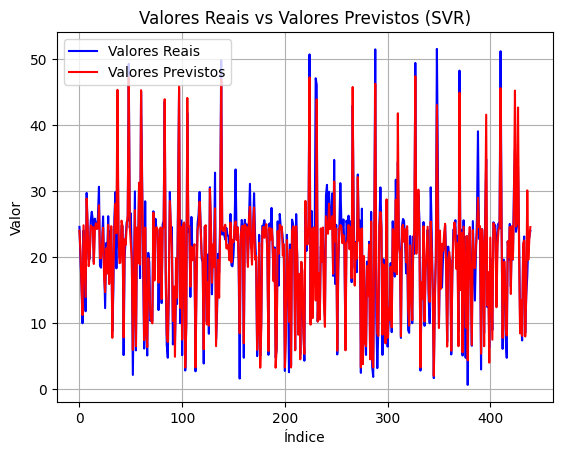

In [79]:
indices = range(len(y_test))
plt.plot(indices,y_test,label='Valores Reais', color='blue')
plt.plot(indices, y_pred, label = 'Valores Previstos', color='red')
plt.title('Valores Reais vs Valores Previstos (SVR)')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

### SHAP: Gradient Boosting

In [49]:
background_data_summary = shap.sample(X_train, 100)

explainer = shap.KernelExplainer(gb_model.predict, background_data_summary)

In [50]:
shap_values = explainer.shap_values(X_test)

100%|██████████| 440/440 [02:15<00:00,  3.24it/s]


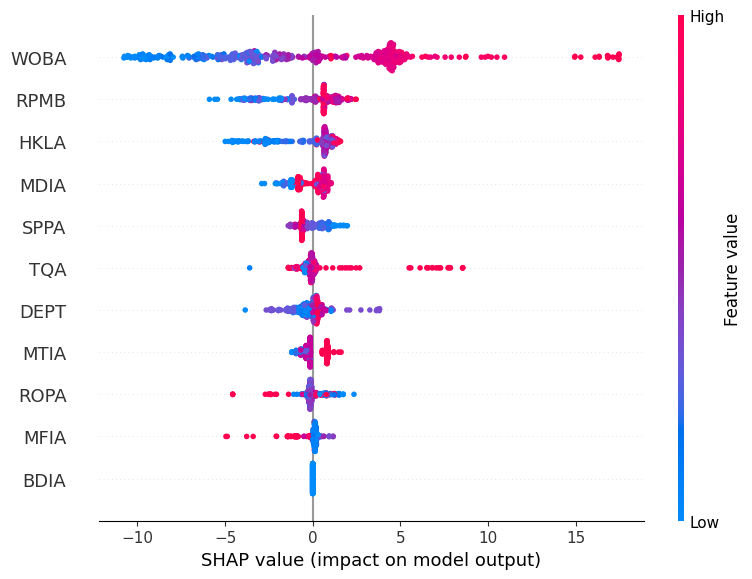

In [51]:
shap.summary_plot(shap_values, X_test, feature_names=selected_features)

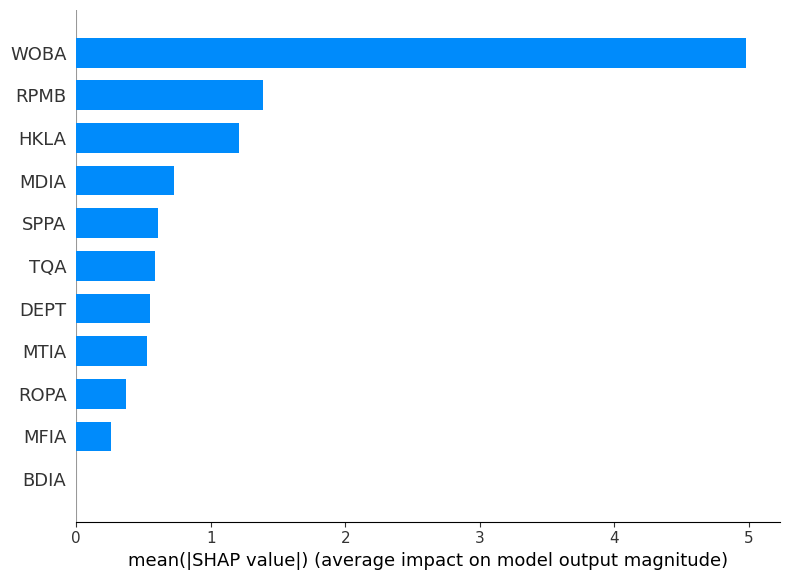

In [52]:
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=selected_features)

### Decision Tree

In [80]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()

In [81]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [82]:
y_pred = dt_model.predict(X_test)

In [85]:
# def error_report(y_test, previsoes, model_name, code, erros)
# error_report(y_test, y_pred, 'Support Vector Regression ', 'SVR(kernel = \'linear\', C=1.0, epsilon = 0.1)', erros)
error_report(y_test, y_pred, 'Decision Tree', 'dt_model = DecisionTreeRegressor()', erros)
erros.head()

Mean Absolute Error: 1.640090909090909
Mean Absolute percentage Error 0.104332901057054
R2 Score 0.8638912693692511
Root Mean Squared Error 3.4332219164034137


,Model,Parameters,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score,Mean Squared Error,Root Mean Squared Error
0,Support Vector Regression,"SVR(kernel = 'linear', C=1.0, epsilon = 0.1)",4.557835,0.382671,0.558399,38.242679,6.184067
1,Random Forest Regressor,RandomForestRegressor(),1.326178,0.098862,0.927021,6.319987,2.513958
2,Gradient Boosting Regressor,GradientBoostingRegressor(),1.763995,0.140206,0.901704,8.512409,2.917603
3,Decision Tree,dt_model = DecisionTreeRegressor(),1.640091,0.104333,0.863891,11.787013,3.433222


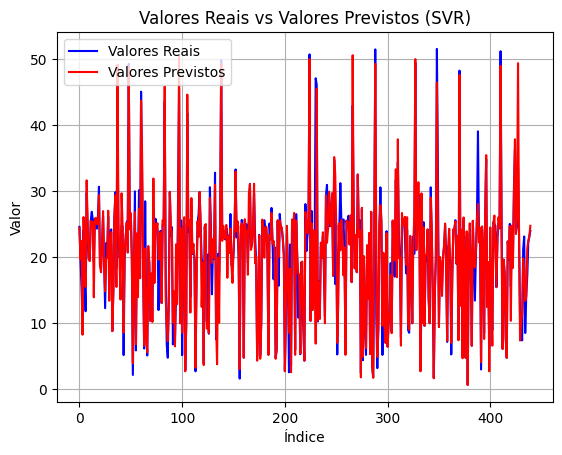

In [86]:
indices = range(len(y_test))
plt.plot(indices,y_test,label='Valores Reais', color='blue')
plt.plot(indices, y_pred, label = 'Valores Previstos', color='red')
plt.title('Valores Reais vs Valores Previstos (SVR)')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

### SHAP: Decision Tree

In [59]:
background_data_summary = shap.sample(X_train, 100)

explainer = shap.KernelExplainer(gb_model.predict, background_data_summary)

In [60]:
shap_values = explainer.shap_values(X_test)

100%|██████████| 440/440 [02:16<00:00,  3.21it/s]


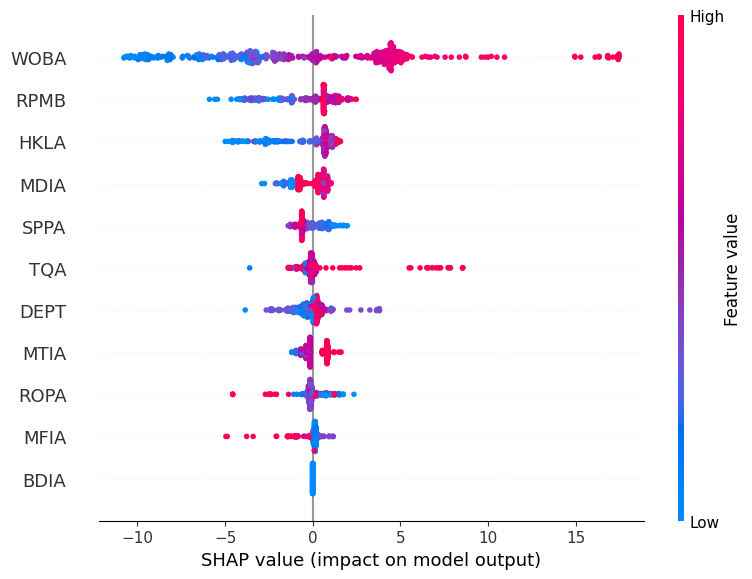

In [61]:
shap.summary_plot(shap_values, X_test, feature_names=selected_features)

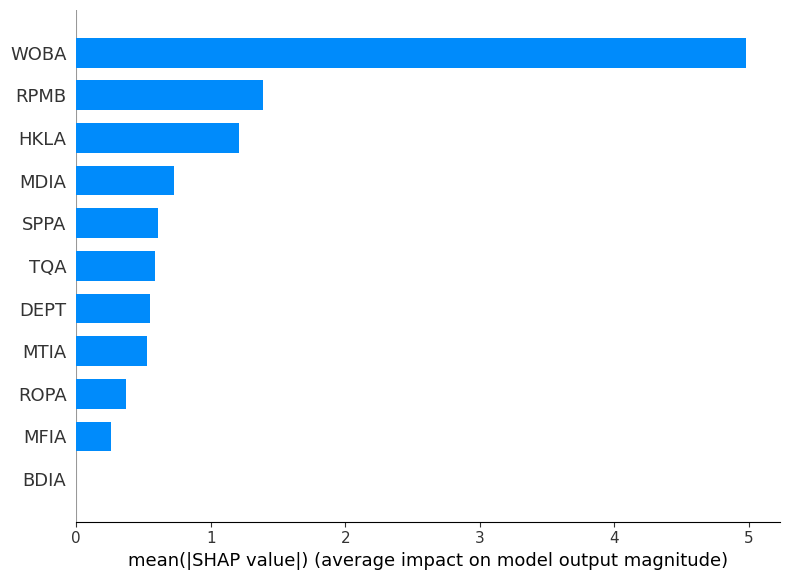

In [62]:
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=selected_features)

### MLP Regressor

In [87]:
from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(hidden_layer_sizes=(100,50), activation= 'relu', solver = 'adam', max_iter=500)

In [88]:
mlp_model.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500)

In [89]:
y_pred = mlp_model.predict(X_test)

In [91]:
# def error_report(y_test, previsoes, model_name, code, erros)
# error_report(y_test, y_pred, 'Support Vector Regression ', 'SVR(kernel = \'linear\', C=1.0, epsilon = 0.1)', erros)
error_report(y_test, y_pred, 'MLP Regressor', 'mlp_model = MLPRegressor(hidden_layer_sizes=(100,50), activation= "relu", solver = "adam", max_iter=500)', erros)
erros.head()

Mean Absolute Error: 4.410424562408131
Mean Absolute percentage Error 0.3676781783874607
R2 Score 0.5982599961410775
Root Mean Squared Error 5.89836201500137


,Model,Parameters,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score,Mean Squared Error,Root Mean Squared Error
0,Support Vector Regression,"SVR(kernel = 'linear', C=1.0, epsilon = 0.1)",4.557835,0.382671,0.558399,38.242679,6.184067
1,Random Forest Regressor,RandomForestRegressor(),1.326178,0.098862,0.927021,6.319987,2.513958
2,Gradient Boosting Regressor,GradientBoostingRegressor(),1.763995,0.140206,0.901704,8.512409,2.917603
3,Decision Tree,dt_model = DecisionTreeRegressor(),1.640091,0.104333,0.863891,11.787013,3.433222
4,MLP Regressor,mlp_model = MLPRegressor(hidden_layer_sizes=(1...,4.410425,0.367678,0.598260,34.790674,5.898362


### Gerando o relatório de erros

In [ ]:
erros.to_csv('erros.csv', index=False)